In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate



In [2]:

n = 50
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [3]:

   
def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n * np.math.factorial(n))
    
    return poly
    
Legendre = []
DLegendre = []

for i in range(n+1):
    
    Poly = GetLegendre(i,x,y)
    Legendre.append(Poly)
    DLegendre.append( sym.diff(Poly,x,1) )

In [4]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [5]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [6]:


def GetAllRoots(n,xn,Legendre,DLegendre):

    poly = sym.lambdify([x],Legendre[n],'numpy')
    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Roots = GetRoots(poly,Dpoly,xn)

    return Roots


xn = np.linspace(-1,1,100)
Roots = GetAllRoots(n,xn,Legendre,DLegendre)

In [7]:


def GetWeights(Roots,DLegendre):

    Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
    Weights= 2/( (1-Roots**2)*Dpoly(Roots)**2 )

    return Weights
Weights = GetWeights(Roots,DLegendre)
print(Weights)


[0.00290862 0.01811556 0.02178024 0.02536067 0.02884299 0.03221373
 0.03545984 0.04940094 0.0516557  0.0516557  0.05371062 0.05371062
 0.05555774 0.05555774 0.05718993 0.05718993 0.05860085 0.05860085
 0.05978506 0.05978506 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.06073797
 0.05978506 0.05978506 0.05860085 0.05718993 0.05718993 0.05718993
 0.05718993 0.05555774 0.05555774 0.05371062 0.05371062 0.0516557
 0.0516557  0.04695505 0.0443275  0.04152846 0.03545984 0.03221373
 0.02884299 0.02536067 0.02178024 0.01811556 0.00290862]


In [41]:
Roots,Weights = np.polynomial.legendre.leggauss(50)

In [47]:
k=1.38*10**(-23)
h_wd=k*300
t_d=300
delta_t=0.0001
T=np.linspace(0,40,10000)
def funcion(x,t,delta_t):
    delta_prima=h_wd*delta_t
    H=np.tanh(np.sqrt(x**2 + delta_prima**2)*(t_d/(2*t)))
    J=np.sqrt(x**2+delta_prima**2)
    r=H/J
    return (r/2)
    

for t in T:
    I=np.sum(funcion(Roots,t,delta_t)*Weights)
    if I < 1/0.3:
        r = I
        break
    
   
t


C:\Users\JC224F~1.GUT\AppData\Local\Temp/ipykernel_6492/3861936525.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  H=np.tanh(np.sqrt(x**2 + delta_prima**2)*(t_d/(2*t)))


12.137213721372138

C:\Users\JC224F~1.GUT\AppData\Local\Temp/ipykernel_6492/2943943334.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  H=np.tanh(np.sqrt(x**2 + delta_prima**2)*(t_d/(2*t)))


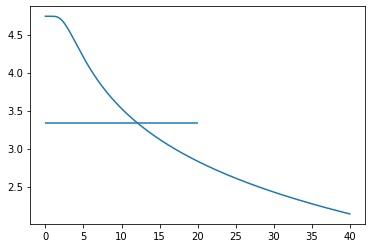

In [46]:
plt.plot(T,[np.sum(funcion(Roots,t,delta_t)*Weights) for t in T])
plt.hlines(1/0.3,0,20)